## Exploratory Data Analysis (EDA)
Once the data has been initially profiled, and any major defects have been addressed, exploratory analytic techniques can then be implemented to gain an understanding of how the values in each feature (column) are distributed, and how each feature is correlated to the **target** (i.e., the value to be predicted).

Exploratory Data Analysis (EDA) is not limited to a single step of the data science process; rather, it is implemented throughout. Various EDA techniques were already implemented during the initial data profiling process, as well as during the effort to prepare the dataset. In this step of the data science process, EDA techniques are focused on observing the interrelationships amongst the features to determine their levels of independence (i.e., identifying any feature interactions), and tentatively identifying which features exhibit the greatest correlation to the target. This also includes identifying opportunities to implement various **feature engineering** techniques that are aimed at enhancing the influence of existing features, and potentially creating *new* features that may be more influential than the organic features. EDA techniques will then be used for **feature selection** (i.e., identifying the smallest possible feature subset required to produce the most parsimonious solution for training the most effective machine learning model). What's more, EDA techniques will be used during the model evaluation process to explain the rationale behind each individual inference (prediction) each of our candidate models generate.

#### Import Libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

#### Import the Data

In [2]:
data_dir = os.path.join(os.getcwd(), 'Data')
source_data_file = 'titanic-eda.csv';

data_file = os.path.join(data_dir, source_data_file)
df = pd.read_csv(data_file, header=0, index_col=0)

# Ensure the index values are: seed=1, increment=1
df.reset_index(drop=True, inplace=True)

print(f"Shape: {df.shape[0]} Observations x {df.shape[1]} Features")

Shape: 1307 Observations x 17 Features


In [3]:
df.head()

,age,fare,body,cabin,embarked,home.dest,boat,cabin_NA,embarked_NA,boat_NA,home.dest_NA,survived,sex,sibsp,parch,ticket,survived_desc
0,29.0000,211.3375,160.667892,B5,S,"St Louis, MO",2,False,False,False,False,1,female,0,0,24160,survived
1,0.9167,151.5500,160.715252,C22,S,"Montreal, PQ / Chesterville, ON",11,False,False,False,False,1,male,1,2,113781,survived
2,2.0000,151.5500,160.715252,C22,S,"Montreal, PQ / Chesterville, ON",unknown,False,False,True,False,0,female,1,2,113781,perished
3,30.0000,151.5500,135.000000,C22,S,"Montreal, PQ / Chesterville, ON",unknown,False,False,True,False,0,male,1,2,113781,perished
4,25.0000,151.5500,160.715252,C22,S,"Montreal, PQ / Chesterville, ON",unknown,False,False,True,False,0,female,1,2,113781,perished


### 1.0. Analyze Numerical Feature Correlations
#### 1.1. Using a Pearson Correlation Matrix
The correlation matrix presents the extent to which features correlate with one another using signed numerical values. Not only can the extent to which the predictors correlate with the target (response) be observed, but also each feature's level of independence can be observed. This enables identifying **feature interactions** which is helpful when those interactions have greater influence on the target than any of the independent variables. What's more, some machine learning algorithms require all predictors to be independent; therefore, it's important for the sake of model selection to identify any feature interactions. During data preparation it was determined that **survived, sibsp**, and **parch** were *numerical* features that, having discrete values of a very limited range, would possibly influence the *Target* more if treated as *categorical* features. However, here we will assess their levels of correlation as *numerical* values.  

In [4]:
numerical_cols = [col for col in df.columns if df.dtypes[col] != 'O' and df.dtypes[col] != bool]

df[numerical_cols].corr('pearson')

,age,fare,body,survived,sibsp,parch
age,1.000000,0.179413,0.019430,-0.043160,-0.189671,-0.125535
fare,0.179413,1.000000,-0.011885,0.243776,0.159921,0.221261
body,0.019430,-0.011885,1.000000,-0.000338,-0.026126,0.014887
survived,-0.043160,0.243776,-0.000338,1.000000,-0.028420,0.082176
sibsp,-0.189671,0.159921,-0.026126,-0.028420,1.000000,0.373383
parch,-0.125535,0.221261,0.014887,0.082176,0.373383,1.000000


The correlation matrix can be a little difficult to understand, especially if it includes a large number of features, but the numerical values do enable a precise understanding of each feature's level of correlation.  Another popular visualization used to understand feature interactions is the colorbar (aka. the heatmap).

#### 1.2. Using a Colorbar (Heatmap)

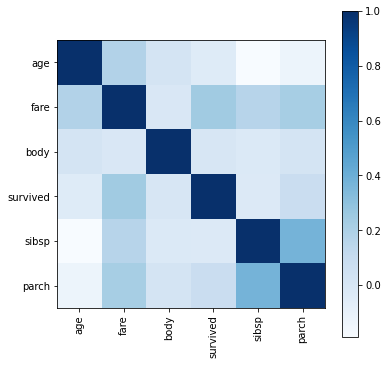

In [5]:
plt.figure(figsize=(6,6))
plt.imshow(df[numerical_cols].corr('pearson'), cmap=plt.cm.Blues, interpolation='nearest')
tick_marks = [i for i in range(len(numerical_cols))]
plt.xticks(tick_marks, numerical_cols, rotation='vertical')
plt.yticks(tick_marks, numerical_cols)
plt.colorbar()
plt.show()

These two methods clearly reveal that **fare** has the strongest correlation to the target. This makes sense since the more expensive staterooms (e.g., first class) afforded easy access to the main deck and the lifeboats while the least expensive staterooms (e.g., steerage) were located far below the main deck, thereby impeding, or even prevented, access to the main deck and the lifeboats.  What's more, these visualizations reveal significant feature interactions between **sibsp** (number of siblings or spouse) and **parch** (number of parents or children), between **fare** and **parch**, between **fare** and **sibsp**, and between **fare** and **age**. These also make sense because together **sibsp** and **parch** reflect the two-way relationships that naturally exist between family members, and because **fare** and **age** reflect that older passengers would be more likely to be wealthy enough to afford the more expensive accommodations.

### 2.0. Analyze the Distribution of the Target class
It is also important to understand the class distribution of the target. In a **classification** task the target will be a categorical variable; whereas in a **regression** task the target will be a continuous numerical variable.  Here we observe the class distribution of a *binary categorical variable* having approximately a 60/40% distribution amongst its classes. In this case, neither category is small enough to be considered a **rare event**; however, in cases where the event of interest represents less than 10% of the total number of observations, some resampling of the target variable may be considered to ensure the machine learning model is trained sufficiently on both categories. If a model is insufficiently trained on all categories of the target then its performance will most likely also be unbalanced.  For example, if only 5% of the observations pertained to passengers who had survived, then the resulting model may accurately predict only those passengers who *perished* while performing poorly when attempting to predict those passengers who *survived*. 

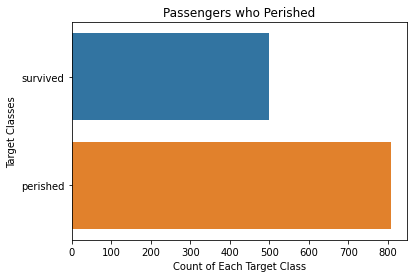

,Percent
survived_desc,
perished,0.617
survived,0.383


In [6]:
sns.countplot(y=df.survived_desc, data=df)
plt.title("Passengers who Perished")
plt.xlabel("Count of Each Target Class")
plt.ylabel("Target Classes")
plt.show()

survival = pd.crosstab(index=df.survived_desc, columns=["Percent"], colnames=[""])
round(survival/survival.sum(), 3)

### 3.0. Evaluate the Influence Each Numeric Feature Has Upon the Target
Since an understanding has been achieved regarding the extent to which the *numerical* features correlate, a closer inspection is warranted regarding each numerical features' influence on the *Target*.  Here we use stacked histograms to analyze the comparitive distributions of each *numerical* feature according to whether or not the passenger survived.

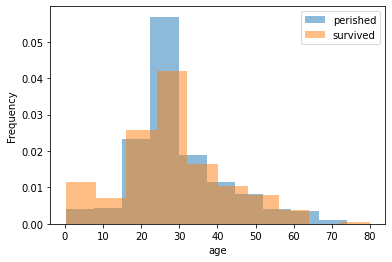

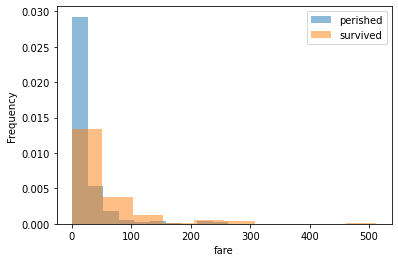

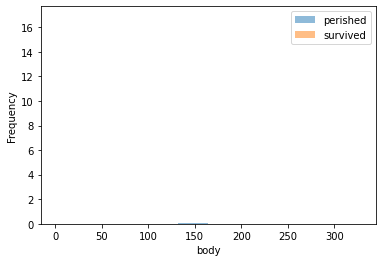

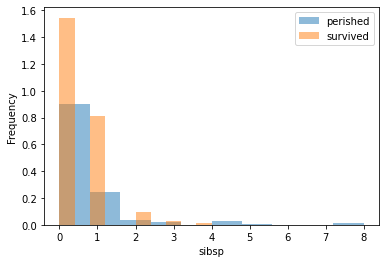

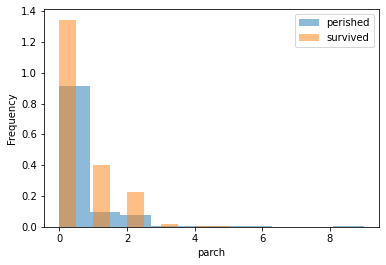

In [7]:
for col in numerical_cols:
    if col != 'survived':
        plt.figure()
        df.groupby(df.survived_desc)[col].plot.hist(alpha=0.5, density=True, legend=True)
        plt.xlabel(col)

### 4.0 Analyze Categorical Feature Correlations
Having analyzed the *numerical* features, how the attention can be directed to the *categorical* features. But, first we will treat **survived, sibsp**, and **parch** as *categorical* features so we may observe how they interact with the *Target* and other predictors.
##### Modify the Data Type of Categorical Features Having Numerical Values

In [8]:
df[['survived','sibsp','parch']] = df[['survived','sibsp','parch']].astype('object')
df.dtypes

age              float64
fare             float64
body             float64
cabin             object
embarked          object
home.dest         object
boat              object
cabin_NA            bool
embarked_NA         bool
boat_NA             bool
home.dest_NA        bool
survived          object
sex               object
sibsp             object
parch             object
ticket            object
survived_desc     object
dtype: object

##### Separate Numerical and Categorical Features

In [9]:
numerical_cols = [col for col in df.columns if df.dtypes[col] != 'O' and df.dtypes[col] != bool]
categorical_cols = [col for col in df.columns if col not in numerical_cols and df.dtypes[col] != bool]
cat_missing_cols = [col for col in df.columns if df.dtypes[col] == bool]

print(numerical_cols)
print(categorical_cols)
print(cat_missing_cols)

['age', 'fare', 'body']
['cabin', 'embarked', 'home.dest', 'boat', 'survived', 'sex', 'sibsp', 'parch', 'ticket', 'survived_desc']
['cabin_NA', 'embarked_NA', 'boat_NA', 'home.dest_NA']


#### 4.1. First, determine the number of categories per feature

In [10]:
df[categorical_cols].nunique().sort_values(ascending=True)

survived           2
sex                2
survived_desc      2
embarked           3
sibsp              7
parch              8
boat              28
cabin            181
home.dest        369
ticket           927
dtype: int64

#### 4.2. Create Frequency Tables

In [11]:
for col in categorical_cols:
    fig = pd.crosstab(index=df[col], columns=["Percent"], colnames=[""])
    percent = round(fig/fig.sum(), 2)
    display(percent)

,Percent
cabin,
A10,0.0
A11,0.0
A14,0.0
A16,0.0
A18,0.0
...,...
F33,0.0
F38,0.0
F4,0.0


,Percent
embarked,
C,0.21
Q,0.09
S,0.70


,Percent
home.dest,
"?Havana, Cuba",0.0
"Aberdeen / Portland, OR",0.0
"Albany, NY",0.0
"Altdorf, Switzerland",0.0
"Amenia, ND",0.0
...,...
"Worcester, England",0.0
"Worcester, MA",0.0
"Yoevil, England / Cottage Grove, OR",0.0


,Percent
boat,
1,0.00
10,0.02
11,0.02
12,0.01
13,0.03
13 15,0.00
13 15 B,0.00
14,0.03
15,0.03


,Percent
survived,
0,0.62
1,0.38


,Percent
sex,
female,0.36
male,0.64


,Percent
sibsp,
0,0.68
1,0.24
2,0.03
3,0.02
4,0.02
5,0.00
8,0.01


,Percent
parch,
0,0.77
1,0.13
2,0.09
3,0.01
4,0.00
5,0.00
6,0.00
9,0.00


,Percent
ticket,
110152,0.0
110413,0.0
110465,0.0
110469,0.0
110489,0.0
...,...
W./C. 6608,0.0
W./C. 6609,0.0
W.E.P. 5734,0.0


,Percent
survived_desc,
perished,0.62
survived,0.38


Throughout our data profiling and exploratory data analysis activities it has been evident that some of the categorical features contain a large number of categories (members). Not only are those particular features somewhat difficult to visualize, but they may also exhibit weak levels of correlation to the target in their *raw* form.  In the frequency tables above it is clear that **cabin** (181 categories), **boat** (27 categories), **home.dest** (369 categories), and **ticket** (927 categories) are not only difficult to visualize, but the many categories they contain each contribute very little percentage to the whole (100%).   


#### 4.3. Create Stacked Bar Charts
Here we visualize the *correlation-to-target* for only those features having a manageable number of categories (e.g., <= 10). In order to better understand the remaining features (cabin, boat, home.dest, and ticket), and their correlation to the target, we may need to consider implementing a *feature engineering* technique like discretization to "condense" their discriminitory power into a smaller number of more influential categories. This will be demonstrated in the next notebook: **04-Feature Engineering**.

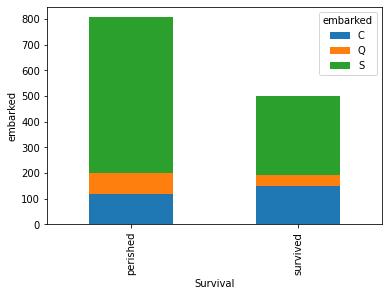

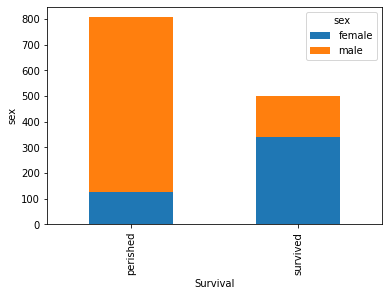

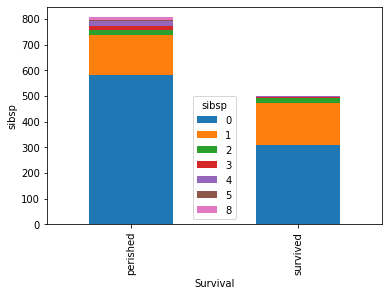

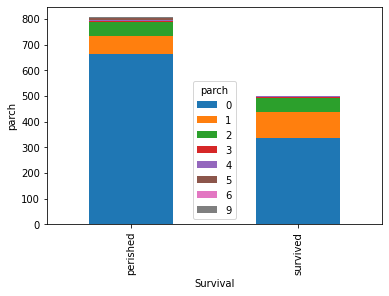

In [12]:
for col in categorical_cols:
    if col not in ['survived','survived_desc'] and df[col].nunique() <= 10:
        fig = pd.crosstab(index=df["survived_desc"], columns=df[col])
        fig.plot(kind="bar", figsize=(6,4), stacked=True, xlabel='Survival', ylabel=col)

The first plot illustrates that most of the surviving passengers embarked at **Southampton, UK** which makes sense because this is where most of the passengers were boarded.  The second plot clearly reveals that a far greater number of **female** passengers survived than did **male** which also makes sense because we know from social convention of the period, and from the historic accounts of the survivers, that *women and children* were first to board lifeboats. 

### 5.0. Explore Feature Interactions
With what the analysis has already been discovered, it would now be interesting to reveal how numerical features (e.g., age, fare, number of parents/children, number of siblings/parents) are distributed amongst the various categories (e.g., sex, point-of-embarkation). This would provide insight as to whether or not families traveling together had a better chance of survival, and whether **age** interacted with **sex** to optimized survival.

#### 5.1. Survival by Gender

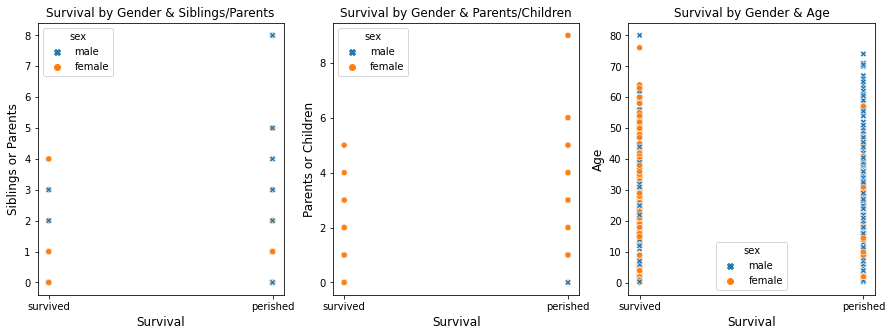

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='survived_desc', y='sibsp', data=df, hue='sex', hue_order=['male','female'], style='sex')
plt.title("Survival by Gender & Siblings/Parents", fontsize = 12)
plt.xlabel("Survival", fontsize=12)
plt.ylabel("Siblings or Parents", fontsize=12)
plt.subplot(1, 3, 2)
sns.scatterplot(x='survived_desc', y='parch', data=df, hue='sex', hue_order=['male','female'], style='sex')
plt.title("Survival by Gender & Parents/Children", fontsize = 12)
plt.xlabel("Survival", fontsize=12)
plt.ylabel("Parents or Children", fontsize=12)
plt.subplot(1, 3, 3)
sns.scatterplot(x='survived_desc', y='age', data=df, hue='sex', hue_order=['male','female'], style='sex')
plt.title("Survival by Gender & Age", fontsize = 12)
plt.xlabel("Survival", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()

#### 5.2. Survival by Fare Amount

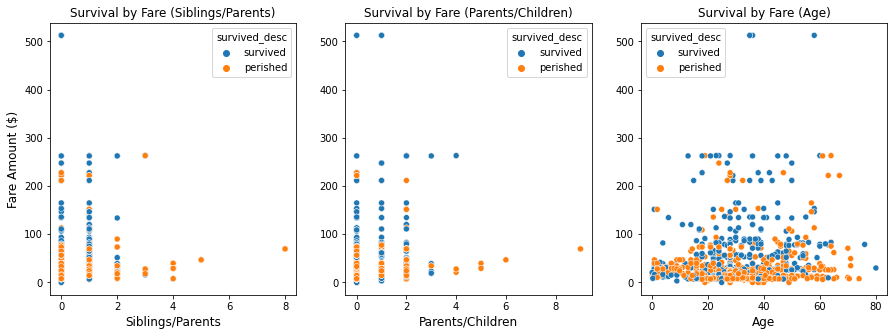

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.scatterplot(y='fare', x='sibsp', data=df, hue='survived_desc')
plt.title("Survival by Fare (Siblings/Parents)", fontsize = 12)
plt.xlabel("Siblings/Parents", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.subplot(1, 3, 2)
sns.scatterplot(y='fare', x='parch', data=df, hue='survived_desc')
plt.title("Survival by Fare (Parents/Children)", fontsize = 12)
plt.xlabel("Parents/Children", fontsize=12)
plt.ylabel("")
plt.subplot(1, 3, 3)
sns.scatterplot(y='fare', x='age', data=df, hue='survived_desc')
plt.title("Survival by Fare (Age)", fontsize = 12)
plt.xlabel("Age", fontsize=12)
plt.ylabel("")
plt.show()

#### 5.3. Survival by Point of Embarkation

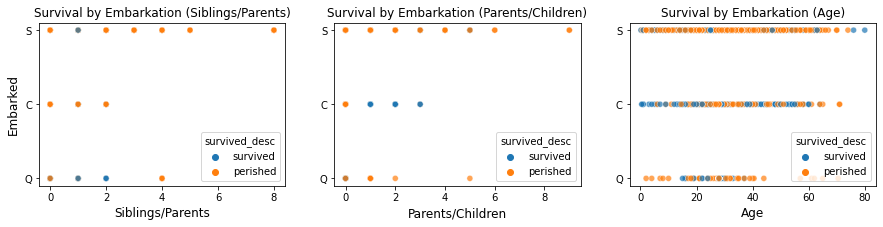

In [15]:
plt.figure(figsize=(15,3))
plt.subplot(1, 3, 1)
sns.scatterplot(y='embarked', x='sibsp', data=df, hue='survived_desc', alpha=0.7)
plt.title("Survival by Embarkation (Siblings/Parents)", fontsize = 12)
plt.xlabel("Siblings/Parents", fontsize=12)
plt.ylabel("Embarked", fontsize=12)
plt.subplot(1, 3, 2)
sns.scatterplot(y='embarked', x='parch', data=df, hue='survived_desc', alpha=0.7)
plt.title("Survival by Embarkation (Parents/Children)", fontsize = 12)
plt.xlabel("Parents/Children", fontsize=12)
plt.ylabel("")
plt.subplot(1, 3, 3)
sns.scatterplot(y='embarked', x='age', data=df, hue='survived_desc', alpha=0.7)
plt.title("Survival by Embarkation (Age)", fontsize = 12)
plt.xlabel("Age", fontsize=12)
plt.ylabel("")
plt.show()